In [3]:
import os
import joblib
from os.path import join

import numpy as np

In [4]:
root_folder = "../results_eval_tune"

In [7]:
model_dict = {}

files = os.listdir(root_folder)

for file in files:
    if "xgb" not in file:
        continue
    if "1k"  in file or "Jun-12" in file:
        continue

    
    #if "freeze" not in file:
    #    continue
    eval_tuning_path = join(root_folder, file)
    study_list =  os.listdir(eval_tuning_path)
    study_list = [study for study in study_list if study.endswith(".pkl") and study != "cfg.pkl"]
    #if len(study_list) != 10:
    #    continue
    print(file, len(study_list))

    names = ["hyperparams", "eval_score", "score_dict", "y_pred_logits", "y_pred_binary", "y_true"]
    models = [joblib.load(join(eval_tuning_path, study))[-1] for study in study_list]
    model_dict[file] = models
    # print hyperparams:
    if "opt" in file:
        for study in study_list:
            hypers = joblib.load(join(eval_tuning_path, study))[0]
            print(hypers["df"])


Jun-11-15:54:10_xgb_0k_10_5 10


In [8]:
feat_imp_dict = {}
for key in model_dict:
    if isinstance(model_dict[key][0], np.ndarray):
        continue
    print(key)
    feat_imp_dict[key] = [model.feature_importances_ for model in model_dict[key]]

Jun-11-15:54:10_xgb_0k_10_5


In [9]:
for key in feat_imp_dict:
    print(key)
    mean_feats = np.mean(feat_imp_dict[key], axis=0)
    std_feats = np.std(feat_imp_dict[key], axis=0)

    print(mean_feats.sum())

Jun-11-15:54:10_xgb_0k_10_5
1.0


In [10]:
for key in feat_imp_dict:
    num_feats_key = feat_imp_dict[key][0].shape[0]
    print(key)
    print(num_feats_key)
    print()
    assert num_feats_key > 4, f'{key}, {num_feats_key}'

Jun-11-15:54:10_xgb_0k_10_5
287



In [11]:
#feat_imp_dict["Dec-12-14:24:23_xgb_5k_freeze_10_5_clinical_blood"][0].shape

In [12]:
#feat_imp_dict["Dec-12-18:33:22_xgb_5k_freeze_10_5_clinical_imaging_pca"][0].shape

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import sys
import importlib
sys.path.append("..")

import src.utils.load_data_utils
importlib.reload(src.utils.load_data_utils)
from src.utils.load_data_utils import get_data

df = "yeo_N/normalization_z/median/uni_clip_0.9999/multi_clip_N"
x_train, y_train, x_eval, y_eval, n_features, feature_names, class_weights = get_data(df_name=df, split='no-split', nf=0, v=0, miss_feats=0
             )

In [15]:
data_first = x_train[0]
data_len = len(data_first)
print("Num feats: ", data_first.shape[1])
print("All:", data_len, "Dev:", int(data_len * 0.8), "Test", int(data_len * 0.2))
print("Train split size: ", int(data_len * 0.8 * 0.9), "Val split size: ", int(data_len * 0.8 * 0.1))

Num feats:  287
All: 30068 Dev: 24054 Test 6013
Train split size:  21648 Val split size:  2405


In [16]:
len(feature_names)

287

In [17]:
study_name = list(feat_imp_dict.keys())[0]

In [18]:
#study_name = [key for key in feat_imp_dict if all([dt in key for dt in dts]) and not any([dt in key for dt in [other_dt for other_dt in all_dts if other_dt not in dts]])]
#study_name = study_name[0]
#study_name

In [19]:
feat_imp_dict[study_name][0].shape

(287,)

In [20]:
rename = True
if rename:
    feature_names = [col.replace("_", " ") for col in feature_names]
    feature_names = [col.replace(" nan", " - Missingness Feature") for col in feature_names]
    feature_names = [col[0].upper() + col[1:] for col in feature_names]

In [21]:
df = pd.DataFrame(data=feat_imp_dict[study_name], columns=feature_names)

287
189
xgb


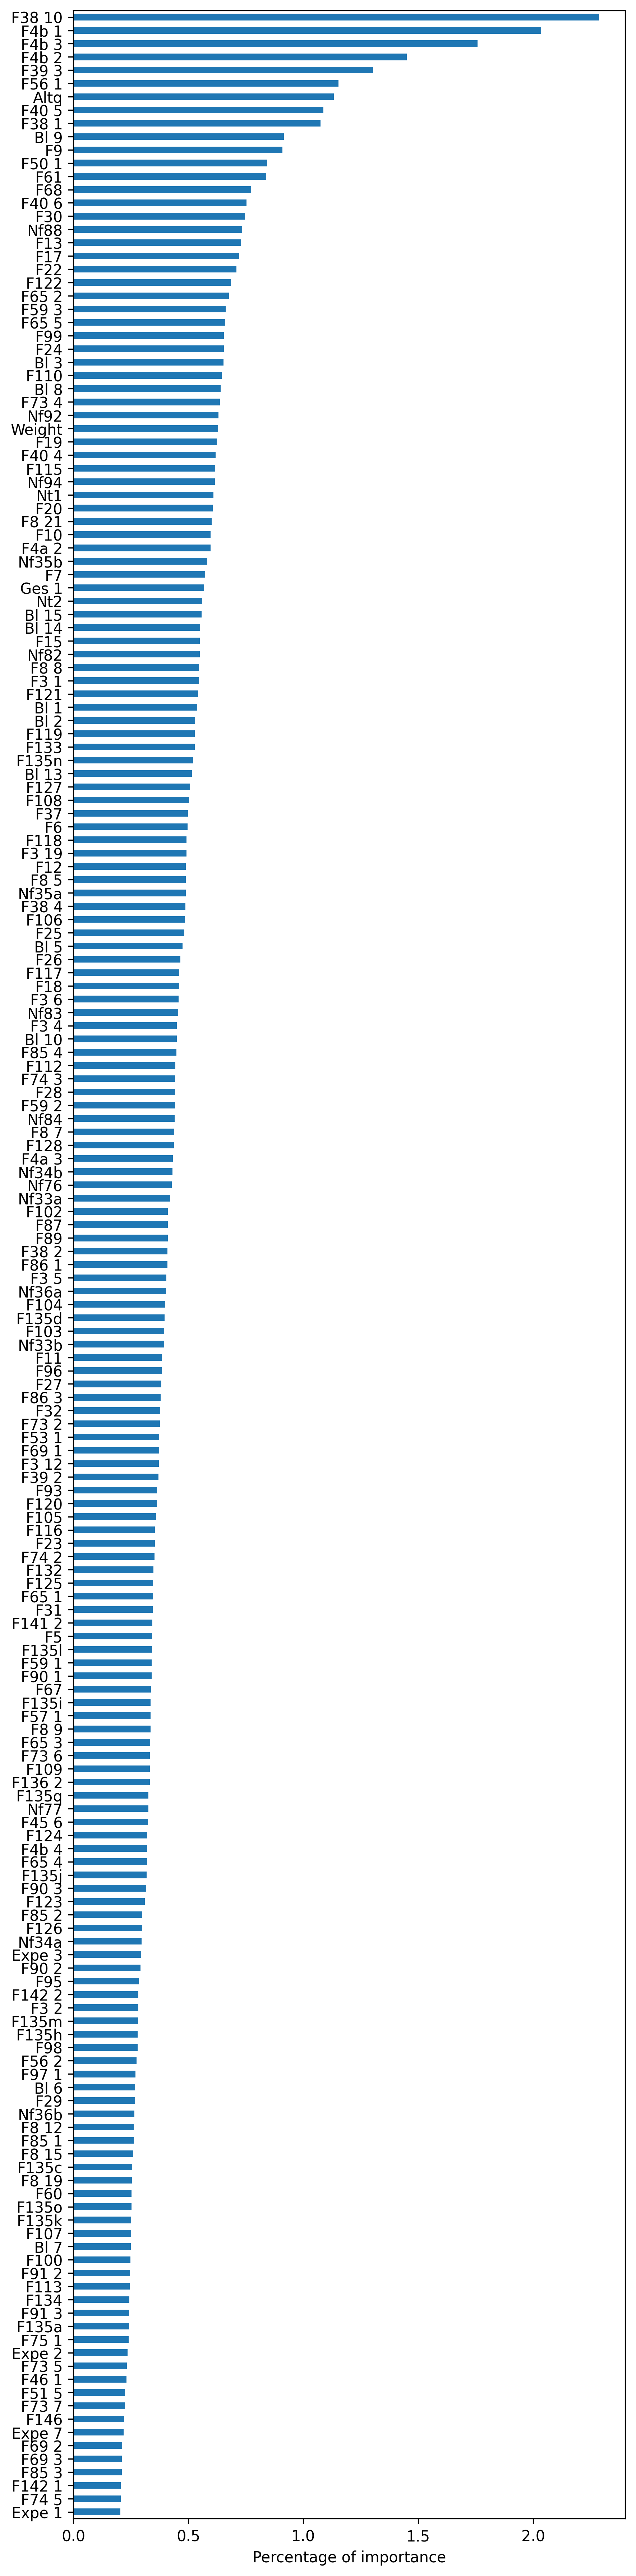

In [25]:
mean_df = df.mean(axis=0).sort_values(ascending=True)
# remove everything above 90% explained importance
print(len(mean_df))
mean_df = mean_df[mean_df.cumsum() > 0.1]
print(len(mean_df))
mean_df = mean_df * 100
plt.figure(figsize=(6, 24), dpi=300)

plt.xlabel("Percentage of importance")
fig = mean_df.plot.barh()
plt.tight_layout()
name = "xgb"
print(name)
plt.savefig(name + "importances.jpg")
mean_df.to_csv(name + "importances.csv")

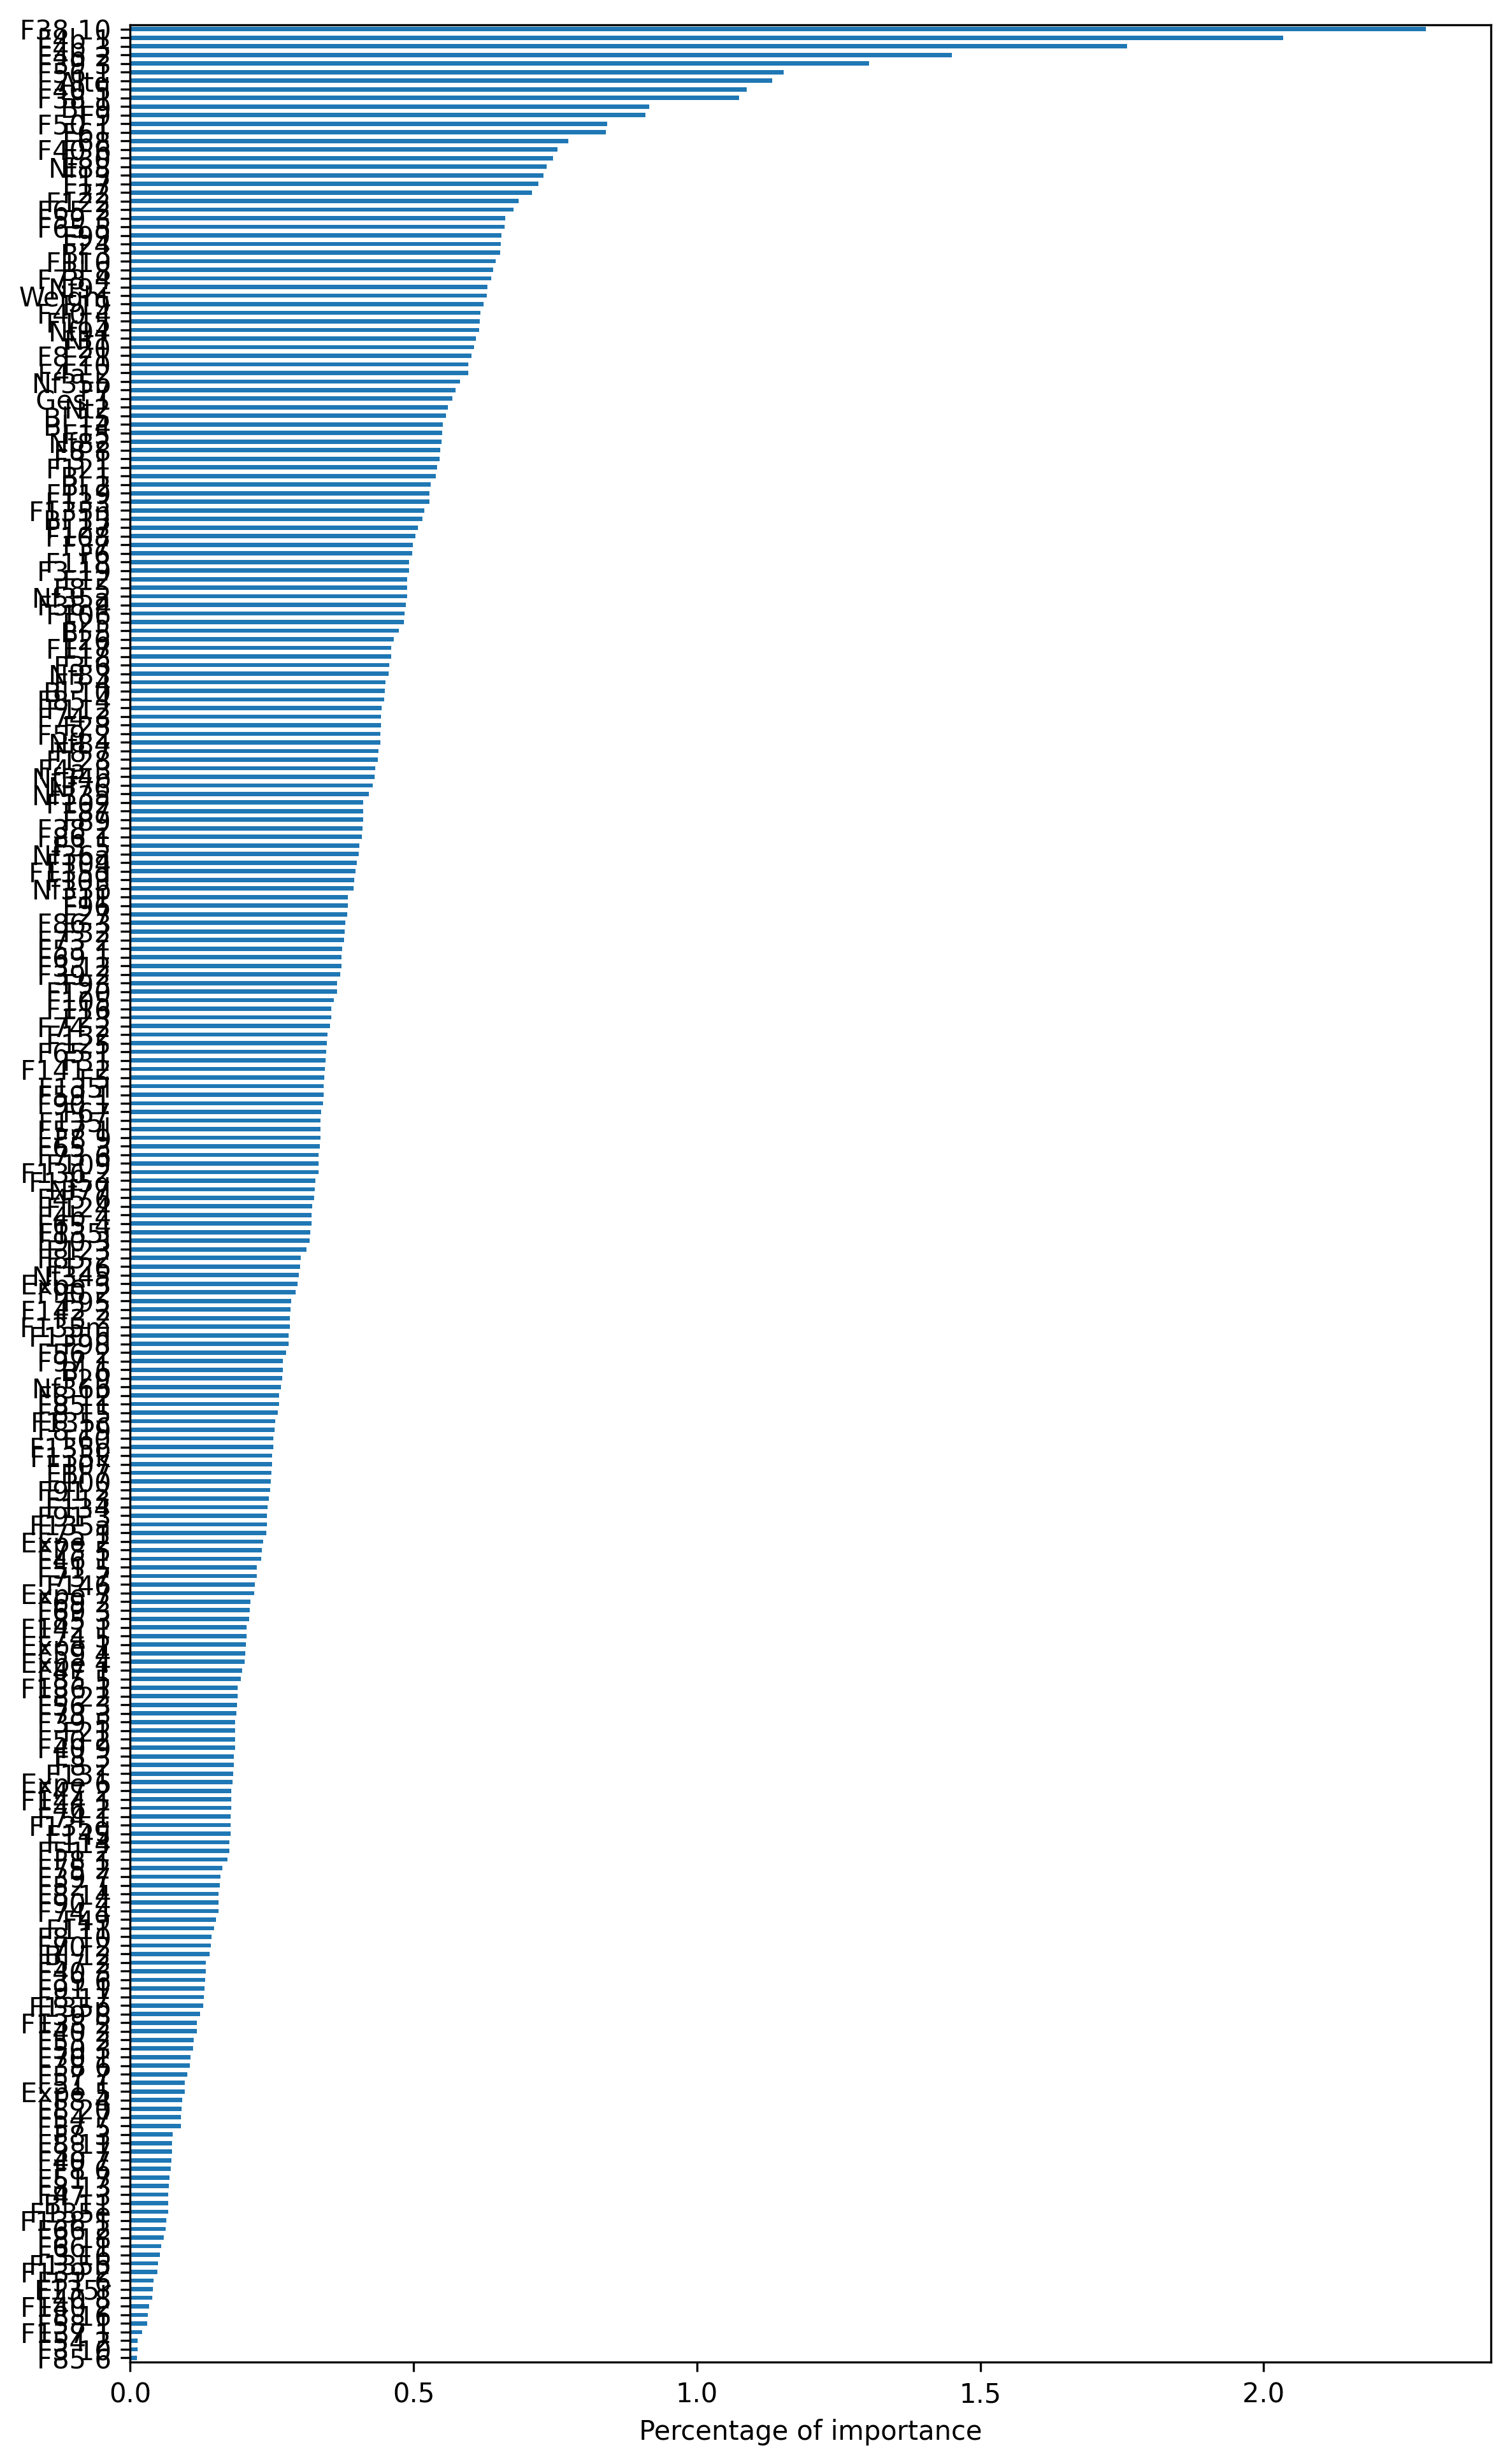

In [23]:
mean_df = df.mean(axis=0).sort_values(ascending=True)
mean_df = mean_df[mean_df != 0]
mean_df = mean_df * 100
plt.figure(figsize=(8, 13), dpi=300)
plt.xlabel("Percentage of importance")
fig = mean_df.plot.barh()
plt.tight_layout()
#name = "_".join(dts)
#plt.savefig(name + "importances.jpg")
#mean_df.to_csv(name + "importances.csv")

In [ ]:
len(mean_df)